# Maze Environment Project
This project simulates a maze environment where an agent navigates through different states based on defined actions. The environment includes specific elements such as goals, brick walls, and fire:

> 3: Goal state (represented by a diamond), which gives a reward of +10.

> 5: Brick wall, where movement is not possible.

> 7: Fire state, which incurs a penalty of -10.

The agent can move in four directions: left, right, up, and down, with state transitions and rewards modeled accordingly. The objective is to navigate the maze efficiently while maximizing rewards and avoiding penalties.

# Import Library

In [93]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

print('numpy version:',np.__version__)

numpy version: 1.26.4


## State Transition Matrix Initialization:

In [95]:
import numpy as np

# Initialize state transition probabilities with -1 as default value
state_transition_probability = np.zeros((12, 4, 3), dtype=int) - 1


## Rewards Definition:

In [97]:
diamond = 10
fire = -10


## Actions Definition:

In [99]:
# Actions: 0 - left, 1 - right, 2 - up, 3 - down


## State Transitions and Rewards Calculation:

In [101]:
for state in range(12):
    for action in range(4):
        # Default: stay in the same state
        state_transition_probability[state, :, 2] = state

        if action == 0:  # Left
            if state in [0, 4, 6, 8, 3, 7, 5]:
                state_transition_probability[state, action, 0] = state
            elif state in [1, 2, 9, 10, 11]:
                state_transition_probability[state, action, 0] = state - 1

        elif action == 1:  # Right
            if state in [0, 1, 2, 8, 9, 10, 6]:
                state_transition_probability[state, action, 0] = state + 1
            elif state in [3, 4, 11, 7, 5]:
                state_transition_probability[state, action, 0] = state
            if state == 2:
                state_transition_probability[state, action, 1] = diamond
            elif state == 6:
                state_transition_probability[state, action, 1] = fire

        elif action == 2:  # Up
            if state in [0, 1, 2, 3, 5, 7, 9]:
                state_transition_probability[state, action, 0] = state
            elif state in [4, 6, 8, 10, 11]:
                state_transition_probability[state, action, 0] = state - 4
            if state == 11:
                state_transition_probability[state, action, 1] = fire

        else:  # Down
            if state in [0, 2, 4, 6]:
                state_transition_probability[state, action, 0] = state + 4
            elif state in [1, 3, 5, 7, 8, 9, 10, 11]:
                state_transition_probability[state, action, 0] = state


## Fixing Index Errors and Adding Comments:

In [103]:
# Add this to ensure the array is properly set to avoid index errors
for state in range(12):
    for action in range(4):
        # Ensure the reward and next state are set correctly
        if state_transition_probability[state, action, 1] == -1:
            state_transition_probability[state, action, 1] = 0


# Policy Evaluation and Policy Improvement

In [105]:
def policy_evaluation(gamma,theta,Value_function,policy,state_transition_probability,value_range=(-1e3, 1e3)):
    
    while True:
        delta = 0
        for state,_ in enumerate(state_transition_probability):
            v= V[state]
            if state==3 or state==7 or state==5:
                continue
            else:
                
                new_value=sum([
                    policy[state,action]*(new_state[1]+gamma*V[(new_state[0])]) for action, new_state in enumerate(state_transition_probability[state])
                ])
            # Clip the new value to avoid overflow
            new_value = np.clip(new_value, *value_range)
            V[state] =new_value
            delta=max(delta,abs(v-V[state]))
        if delta < theta:
            break
    
    return V

def policy_improvement(policy,gamma, value_function, state_transition_probability,num_states=12):
    policy_stable = True
    
    for state in range(num_states):
        
            
        old_action = np.argmax(policy[state])
        
        if state==3 or state==7 or state==5:
            continue
        else:
            

            best_value = np.argmax([
                policy[state,action]*(new_state[1]+ gamma*V[(new_state[0])])
                for action, new_state in enumerate(state_transition_probability[state])
            ])
            
        new_policy = np.zeros_like(policy[state])
        new_policy[best_value]=1
        policy[state] = new_policy
        #policy[state][best_value]=1

        if old_action != best_value:
            policy_stable = False
  
    return policy, policy_stable





# Initialize all the Parameters

In [107]:
num_states = 12
num_actions=4
gamma = 0.9
theta = 0.01
state_transition_probability
V = np.random.randn(12)*5
V[3]=0
V[5]=np.nan
V[7]=0
policy = np.ones((num_states,num_actions),dtype=int)/num_actions
policy[3]=policy[5]=policy[7]=0

In [108]:
policy_stable=False
i = 0
while not policy_stable:
    i+=1
    V = policy_evaluation(gamma,theta,V,policy,state_transition_probability)
    policy, policy_stable = policy_improvement(policy,gamma, V, state_transition_probability)

print('optimal policy is: ','\n', policy)
print('\n')
print('optimal action value is: ','\n', V)
print('\n')
print('stability:', policy_stable)

optimal policy is:  
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


optimal action value is:  
 [ 8.1       9.       10.        0.        7.29           nan  9.
  0.        6.561     5.9049    5.31441   4.782969]


stability: True


In [109]:
# Actions: 0 - left, 1 - right, 2 - up, 3 - down
for n,state in enumerate(policy):
    if state[0] !=0:
        action = '⬅'
    elif state[1] !=0.:
        action ='➡'
    elif state[2]!=0.:
        action='⬆'
    else:
        action='⬇'
    if n == 3:
        action = '💎'
    elif n ==5:
        action='🧱'
    elif n ==7:
        action ='🔥'
    print(n, action)
    

0 ➡
1 ➡
2 ➡
3 💎
4 ⬆
5 🧱
6 ⬆
7 🔥
8 ⬆
9 ⬅
10 ⬅
11 ⬅


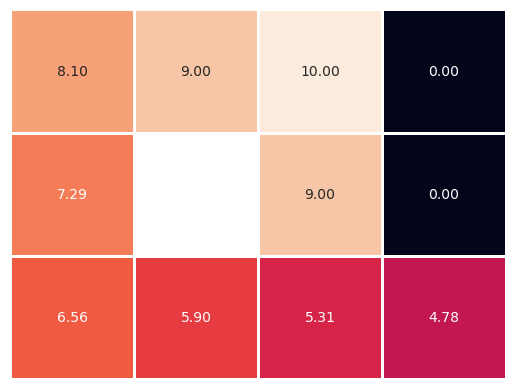

In [126]:
sns.heatmap(V.reshape(3,4), annot=True, lw=.9,fmt='.2f',xticklabels='',yticklabels='',cbar=None,);

In [160]:
state_transition_probability

array([[[  0,   0,   0],
        [  1,   0,   0],
        [  0,   0,   0],
        [  4,   0,   0]],

       [[  0,   0,   1],
        [  2,   0,   1],
        [  1,   0,   1],
        [  1,   0,   1]],

       [[  1,   0,   2],
        [  3,  10,   2],
        [  2,   0,   2],
        [  6,   0,   2]],

       [[  3,   0,   3],
        [  3,   0,   3],
        [  3,   0,   3],
        [  3,   0,   3]],

       [[  4,   0,   4],
        [  4,   0,   4],
        [  0,   0,   4],
        [  8,   0,   4]],

       [[  5,   0,   5],
        [  5,   0,   5],
        [  5,   0,   5],
        [  5,   0,   5]],

       [[  6,   0,   6],
        [  7, -10,   6],
        [  2,   0,   6],
        [ 10,   0,   6]],

       [[  7,   0,   7],
        [  7,   0,   7],
        [  7,   0,   7],
        [  7,   0,   7]],

       [[  8,   0,   8],
        [  9,   0,   8],
        [  4,   0,   8],
        [  8,   0,   8]],

       [[  8,   0,   9],
        [ 10,   0,   9],
        [  9,   0,   9],
       